### 視覺化

#### Python教學-如何解決matplotlib中文亂碼問題

https://pyecontech.com/2020/03/27/python%E6%95%99%E5%AD%B8-%E5%A6%82%E4%BD%95%E8%A7%A3%E6%B1%BAmatplotlib%E4%B8%AD%E6%96%87%E4%BA%82%E7%A2%BC%E5%95%8F%E9%A1%8C/

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = ['Microsoft Yahei']# 指定中文字型
plt.style.use('seaborn-whitegrid')

import seaborn as sns
sns.set_theme(color_codes=True)

In [2]:
# 讀取所有資料
df = pd.read_csv('../data/all_data_final_v4_20210110.csv',encoding='utf-8')

print(df.columns)
print(df.columns.size)
df_X = df[['Station_Type', 'Activated', 'Station_ID', 'Station_Name', 'T_Status','Num_Transfer',
           'Num_Atm','Num_Cstore', 'Num_Med', 
           'Num_Ele', 'Num_Sec', 'Num_High', 'All_School','Num_POI', 'Num_Park', 
           'Num_Village', 'Income_Gross', 'Income_Average','Population', 
           'Child', 'Adult', 'Old_Age', 'Young_Adult', 'Middle_Age','Child_Dep', 'Old_Dep', 
           'Higher_Edu', 'Sec_Edu','Ele_Edu', 'Uneducated', 
           'Male', 'Married', 'Immigrant', 'Birth']]

df_y = df[['Vol_All', 'Vol_Workday', 'Weekend',
       'Median_Rent', 'Num_Cafe', 'Num_Drink', 'Num_Bar', 'Num_Gym',
       'Num_Lodging', 'Cat_Vol', 'Cat_Rent', 'Cat_Cafe', 'Cat_Drink',
       'Cat_Bar', 'Cat_Gym', 'Cat_Lodging']]

df = pd.concat([df_X,df_y],axis=1)

print(df.columns)
df.head(3)

Index(['Station_Type', 'Activated', 'Station_ID', 'Station_Name', 'T_Status',
       'Num_Transfer', 'Num_Atm', 'Num_Cstore', 'Num_Med', 'Num_Ele',
       'Num_Sec', 'Num_High', 'All_School', 'Num_POI', 'Num_Park',
       'Num_Village', 'Income_Gross', 'Income_Average', 'Population', 'Child',
       'Adult', 'Old_Age', 'Young_Adult', 'Middle_Age', 'Child_Dep', 'Old_Dep',
       'Higher_Edu', 'Sec_Edu', 'Ele_Edu', 'Uneducated', 'Male', 'Married',
       'Immigrant', 'Birth', 'Vol_All', 'Vol_Workday', 'Weekend',
       'Median_Rent', 'Num_Cafe', 'Num_Drink', 'Num_Bar', 'Num_Gym',
       'Num_Lodging', 'Cat_Vol', 'Cat_Rent', 'Cat_Cafe', 'Cat_Drink',
       'Cat_Bar', 'Cat_Gym', 'Cat_Lodging'],
      dtype='object')
50
Index(['Station_Type', 'Activated', 'Station_ID', 'Station_Name', 'T_Status',
       'Num_Transfer', 'Num_Atm', 'Num_Cstore', 'Num_Med', 'Num_Ele',
       'Num_Sec', 'Num_High', 'All_School', 'Num_POI', 'Num_Park',
       'Num_Village', 'Income_Gross', 'Income_Average', 'Pop

,Station_Type,Activated,Station_ID,Station_Name,T_Status,Num_Transfer,Num_Atm,Num_Cstore,Num_Med,Num_Ele,...,Num_Bar,Num_Gym,Num_Lodging,Cat_Vol,Cat_Rent,Cat_Cafe,Cat_Drink,Cat_Bar,Cat_Gym,Cat_Lodging
0,TpMrt,1,BL01,頂埔站,N,0.0,13,6,6,5,...,0.0,3.0,0.0,6.0,2,0,0,0,0,0
1,TpMrt,1,BL02,永寧站,N,0.0,11,5,1,9,...,0.0,0.0,0.0,7.0,1,0,0,0,0,0
2,TpMrt,1,BL03,土城站,N,0.0,22,10,28,7,...,1.0,4.0,1.0,6.0,2,0,0,0,1,0


#### 製作多個子圖

Index(['Station_Type', 'Activated', 'Station_ID', 'Station_Name', 'T_Status',
       'Num_Transfer', 'Num_Atm', 'Num_Cstore', 'Num_Med', 'Num_Ele',
       'Num_Sec', 'Num_High', 'All_School', 'Num_POI', 'Num_Park',
       'Num_Village', 'Income_Gross', 'Income_Average', 'Population', 'Child',
       'Adult', 'Old_Age', 'Young_Adult', 'Middle_Age', 'Child_Dep', 'Old_Dep',
       'Higher_Edu', 'Sec_Edu', 'Ele_Edu', 'Uneducated', 'Male', 'Married',
       'Immigrant', 'Birth', 'Vol_All', 'Vol_Workday', 'Weekend',
       'Median_Rent', 'Num_Cafe', 'Num_Drink', 'Num_Bar', 'Num_Gym',
       'Num_Lodging', 'Cat_Vol', 'Cat_Rent', 'Cat_Cafe', 'Cat_Drink',
       'Cat_Bar', 'Cat_Gym', 'Cat_Lodging'],
      dtype='object')


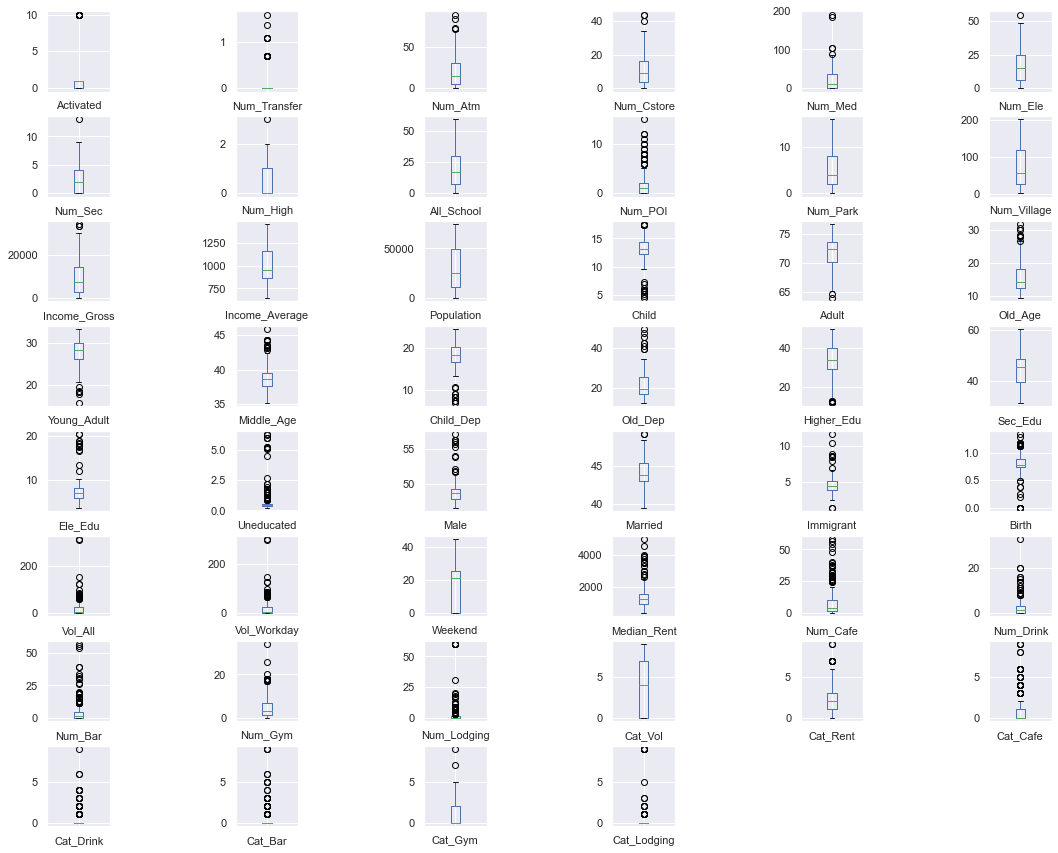

In [3]:
# from matplotlib import cm

print(df.columns)

df.plot(kind='box', figsize=(18,15),
            subplots=True, sharey=False,layout=(-1,6))
            
plt.subplots_adjust(wspace=2, hspace=0.3)

In [4]:
df['Vol_All'].describe()

count    292.000000
mean      17.508250
std       34.806687
min        0.000000
25%        0.000000
50%        1.116000
75%       24.009250
max      315.115000
Name: Vol_All, dtype: float64

<AxesSubplot:ylabel='Frequency'>

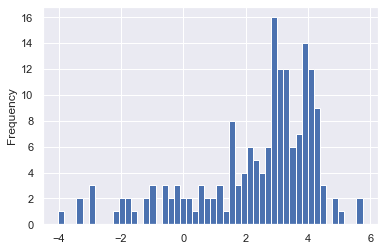

In [5]:

# df_sel = df['Vol_All'].plot(kind='box')
df_vol = np.log( df.loc[df['Vol_All']>0, 'Vol_All'])
# df_vol.plot(kind='box',figsize=(1,2))
df_vol.plot.hist(bins=50, xlabel="Volume")

### Correlation matrix

In [6]:
df_sel = df[['Num_Cafe', 'Num_Drink','Num_Bar', 'Num_Gym', 'Num_Lodging', 
             'Station_Type', 'Num_Transfer',
             'Num_Atm', 'Num_Cstore', 'Num_Med', 'Num_Ele','Num_Sec', 'Num_High', 'All_School', 'Num_POI', 'Num_Park',
             'Num_Village', 'Income_Gross', 'Income_Average', 'Population', 
             'Child','Adult', 'Old_Age', 'Young_Adult', 'Middle_Age', 'Child_Dep','Old_Dep', 
             'Higher_Edu', 'Sec_Edu', 'Ele_Edu', 'Uneducated','Male', 'Married', 'Immigrant', 'Birth' ]]

corr = df_sel.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)


,Num_Cafe,Num_Drink,Num_Bar,Num_Gym,Num_Lodging,Num_Transfer,Num_Atm,Num_Cstore,Num_Med,Num_Ele,Num_Sec,Num_High,All_School,Num_POI,Num_Park,Num_Village,Income_Gross,Income_Average,Population,Child,Adult,Old_Age,Young_Adult,Middle_Age,Child_Dep,Old_Dep,Higher_Edu,Sec_Edu,Ele_Edu,Uneducated,Male,Married,Immigrant,Birth
Num_Cafe,1.00,0.73,0.82,0.80,0.66,0.33,0.76,0.69,0.71,0.49,0.53,0.26,0.52,0.45,0.51,0.55,0.73,0.58,0.60,0.09,-0.60,0.38,-0.40,-0.15,0.25,0.41,0.52,-0.54,-0.32,-0.21,-0.41,0.27,0.15,-0.05
Num_Drink,0.73,1.00,0.82,0.66,0.53,0.15,0.58,0.54,0.59,0.34,0.38,0.12,0.36,0.30,0.33,0.32,0.50,0.40,0.37,0.07,-0.41,0.26,-0.27,-0.11,0.18,0.28,0.37,-0.38,-0.24,-0.15,-0.29,0.22,0.18,-0.02
Num_Bar,0.82,0.82,1.00,0.73,0.64,0.21,0.66,0.60,0.67,0.35,0.41,0.10,0.37,0.33,0.39,0.40,0.56,0.44,0.45,0.09,-0.45,0.28,-0.29,-0.14,0.22,0.30,0.39,-0.41,-0.25,-0.16,-0.31,0.19,0.14,-0.01
Num_Gym,0.80,0.66,0.73,1.00,0.41,0.33,0.82,0.74,0.84,0.68,0.57,0.17,0.70,0.26,0.63,0.61,0.75,0.57,0.67,0.08,-0.51,0.32,-0.36,-0.09,0.22,0.35,0.55,-0.53,-0.37,-0.29,-0.49,0.28,0.10,-0.07
Num_Lodging,0.66,0.53,0.64,0.41,1.00,0.27,0.53,0.48,0.35,0.10,0.28,0.09,0.14,0.36,0.23,0.34,0.39,0.27,0.33,0.03,-0.31,0.21,-0.21,-0.07,0.11,0.22,0.22,-0.24,-0.12,-0.09,-0.19,0.04,0.18,-0.00
Num_Transfer,0.33,0.15,0.21,0.33,0.27,1.00,0.34,0.28,0.23,0.11,0.19,0.08,0.13,0.13,0.17,0.21,0.24,0.19,0.22,0.06,-0.14,0.06,-0.06,-0.07,0.11,0.07,0.17,-0.18,-0.12,-0.10,-0.14,0.08,0.12,0.05
Num_Atm,0.76,0.58,0.66,0.82,0.53,0.34,1.00,0.92,0.82,0.66,0.60,0.23,0.68,0.33,0.63,0.68,0.76,0.54,0.72,0.04,-0.47,0.31,-0.32,-0.07,0.17,0.33,0.53,-0.50,-0.35,-0.32,-0.50,0.23,0.05,-0.07
Num_Cstore,0.69,0.54,0.60,0.74,0.48,0.28,0.92,1.00,0.78,0.66,0.55,0.19,0.68,0.27,0.58,0.67,0.65,0.39,0.67,-0.01,-0.33,0.24,-0.24,-0.01,0.09,0.24,0.41,-0.36,-0.28,-0.31,-0.45,0.08,-0.00,-0.09
Num_Med,0.71,0.59,0.67,0.84,0.35,0.23,0.82,0.78,1.00,0.67,0.59,0.17,0.69,0.19,0.55,0.54,0.66,0.47,0.60,0.06,-0.44,0.28,-0.30,-0.10,0.19,0.30,0.45,-0.44,-0.30,-0.25,-0.40,0.21,0.03,-0.06
Num_Ele,0.49,0.34,0.35,0.68,0.10,0.11,0.66,0.66,0.67,1.00,0.68,0.19,0.99,0.14,0.64,0.70,0.69,0.42,0.73,0.04,-0.29,0.18,-0.21,-0.02,0.14,0.19,0.46,-0.40,-0.35,-0.38,-0.49,0.13,-0.07,-0.09


In [9]:

print(corr['Num_Cafe'].sort_values(ascending=False),'\n')
print(corr['Num_Drink'].sort_values(ascending=False),'\n')
print(corr['Num_Bar'].sort_values(ascending=False),'\n')
print(corr['Num_Lodging'].sort_values(ascending=False),'\n')

Num_Cafe          1.000000
Num_Bar           0.822343
Num_Gym           0.799028
Num_Atm           0.758462
Num_Drink         0.727785
Income_Gross      0.727634
Num_Med           0.713397
Num_Cstore        0.689350
Num_Lodging       0.657925
Population        0.600797
Income_Average    0.576764
Num_Village       0.549354
Num_Sec           0.532375
All_School        0.522076
Higher_Edu        0.521064
Num_Park          0.506609
Num_Ele           0.485617
Num_POI           0.453212
Old_Dep           0.411119
Old_Age           0.378972
Num_Transfer      0.325899
Married           0.269494
Num_High          0.259793
Child_Dep         0.252060
Immigrant         0.148859
Child             0.089667
Birth            -0.046559
Middle_Age       -0.153396
Uneducated       -0.209599
Ele_Edu          -0.317926
Young_Adult      -0.401862
Male             -0.409390
Sec_Edu          -0.543272
Adult            -0.595106
Name: Num_Cafe, dtype: float64 

Num_Drink         1.000000
Num_Bar           0.82

#### 以散布圖矩陣(scatter_matrix)檢查各因子間的相關性 

In [10]:
print(df.columns)

Index(['Station_Type', 'Activated', 'Station_ID', 'Station_Name', 'T_Status',
       'Num_Transfer', 'Num_Atm', 'Num_Cstore', 'Num_Med', 'Num_Ele',
       'Num_Sec', 'Num_High', 'All_School', 'Num_POI', 'Num_Park',
       'Num_Village', 'Income_Gross', 'Income_Average', 'Population', 'Child',
       'Adult', 'Old_Age', 'Young_Adult', 'Middle_Age', 'Child_Dep', 'Old_Dep',
       'Higher_Edu', 'Sec_Edu', 'Ele_Edu', 'Uneducated', 'Male', 'Married',
       'Immigrant', 'Birth', 'Vol_All', 'Vol_Workday', 'Weekend',
       'Median_Rent', 'Num_Cafe', 'Num_Drink', 'Num_Bar', 'Num_Gym',
       'Num_Lodging', 'Cat_Vol', 'Cat_Rent', 'Cat_Cafe', 'Cat_Drink',
       'Cat_Bar', 'Cat_Gym', 'Cat_Lodging'],
      dtype='object')


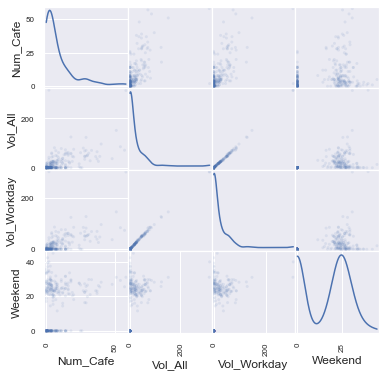

In [11]:
# 車站流量
from pandas.plotting import scatter_matrix

df_sel = df[[ 'Num_Cafe','Vol_All', 'Vol_Workday', 'Weekend' 
              ]]

scatter_matrix(df_sel, alpha=0.1, figsize=(6, 6), diagonal="kde");

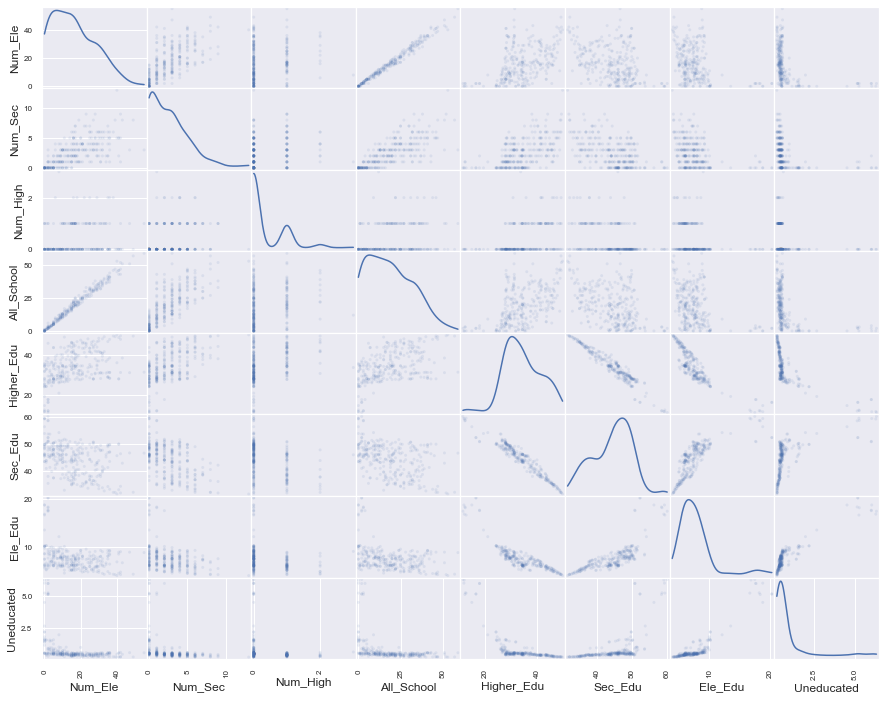

In [12]:
# 教育
from pandas.plotting import scatter_matrix

df_sel = df[[ 'Num_Ele','Num_Sec', 'Num_High', 'All_School', 
             'Higher_Edu', 'Sec_Edu', 'Ele_Edu', 'Uneducated']]

scatter_matrix(df_sel, alpha=0.1, figsize=(15, 12), diagonal="kde");

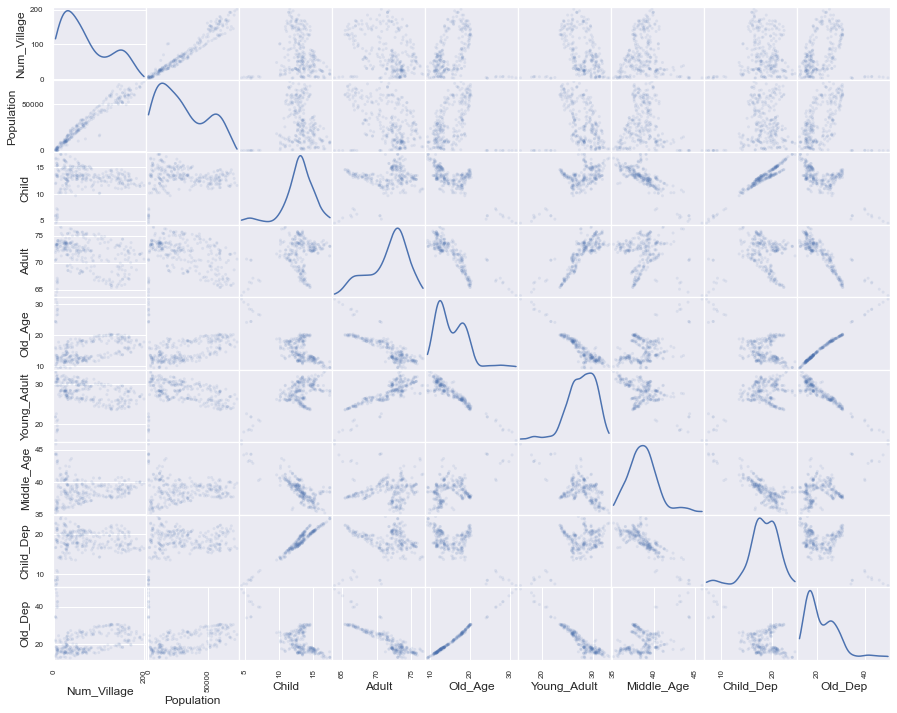

In [14]:
# 年齡
from pandas.plotting import scatter_matrix

df_sel = df[[
             'Num_Village','Population', 
             'Child','Adult', 'Old_Age', 'Young_Adult', 'Middle_Age', 'Child_Dep','Old_Dep', 
            ]]

scatter_matrix(df_sel, alpha=0.1, figsize=(15, 12), diagonal="kde");


In [ ]:
from pandas.plotting import scatter_matrix

df_sel = df[['Num_Cafe', 'Num_Drink','Num_Bar', 'Num_Gym', 'Num_Transfer',
             'Num_Atm', 'Num_Cstore', 'Num_Med', 'Num_Ele','Num_Sec', 'Num_High', 'All_School', 'Num_POI', 'Num_Park',
             'Num_Village', 'Income_Gross', 'Income_Average', 'Population', 
             'Child','Adult', 'Old_Age', 'Young_Adult', 'Middle_Age', 'Child_Dep','Old_Dep', 
             'Higher_Edu', 'Sec_Edu', 'Ele_Edu', 'Uneducated','Male', 'Married', 'Immigrant', 'Birth', ]]

scatter_matrix(df_sel, alpha=0.1, figsize=(15, 12), diagonal="kde");

In [ ]:
# 讀取彙整後的人口結構資料
pop = pd.read_csv('../data/pop_merge.csv',   encoding='utf-8')
print(pop.columns)
pop_sel = pop[['所得平均','人口','0-14歲人口', '15-64歲人口', '65歲以上人口','碩士人口','不識字人口','未婚人口']]

In [ ]:
# from matplotlib import cm

pop_sel.plot(kind='box', 
            subplots=True, sharey=False,layout=(-1,4))
            
plt.subplots_adjust(wspace=2, hspace=0.3)

In [ ]:
from pandas.plotting import scatter_matrix
scatter_matrix(pop_sel, alpha=0.2, figsize=(10, 10), diagonal="kde");